# Hybrid algorithm. Parameter investigation. Evaluation

Base settings: <br/>
1. #of items total = 1000
2. baseline_items = 20
3. LR = 10
4. machine_selection_confidence = 0.95
5. mahine_tests_num = 50
5. Nt = 5
6. J = 3
7. Proportion "IN" items = 0.3
8. #of filters = 4
9. thrsh for "OUT" = 0.99
10. corr values in [0., 0.2, 0.3, 0.5, 0.7, 0.9]
11. machine acuracies is in 0.5-0.95
12. crowd cost = 1 per filter
12. expert cost = 20 per paper
13. results are averaged by 50 repetitions


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
# ![alt text](imagename.png "Title")

In [24]:
def plot_chart(data, title, y_limit=None):
    fig, ax = plt.subplots(figsize=(10,8))
    colors = ['blue', 'blue', 'red', 'red', 'green', 'green']
    algos = ['Machines-Ensemble', 'Hybrid-Ensemble', 'Crowd-Ensemble']
    ax.set_color_cycle(colors)

    markers = ['*', '.', '^']
    def plot_alg(data, alg, marker):
        y = data.loc[(data['algorithm'] == alg)]['recall'].values
        x = data.loc[(data['algorithm'] == alg)]['price_mean'].values
        err_y = data.loc[(data['algorithm'] == alg)]['recall_std'].values
        plt.plot(x, y, label=alg, marker=marker)
        plt.errorbar(x, y, yerr=err_y, marker=marker, elinewidth=1, capsize=2)

    for alg, marker in zip(algos, markers):
        plot_alg(data, alg, marker)
    plt.title(title, size=30)
    plt.xlabel('Price Ratio', size=25)
    plt.ylabel('Recall', size=25)
    plt.legend(fontsize = 25)
    plt.grid()
    if y_limit:
        plt.ylim(y_limit)

# 1. Chart: Base settings

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


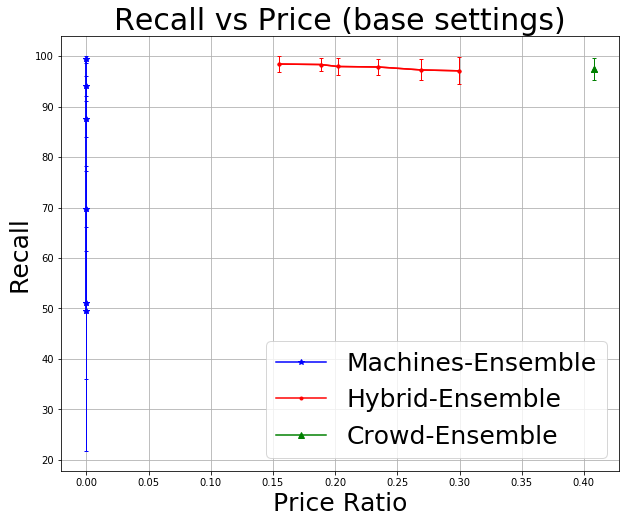

In [25]:
data = pd.read_csv('../output/data/fig0_base_settings.csv')
data['price_mean'] /= 20
data['price_std'] /= 20
title = 'Recall vs Price (base settings)'

plot_chart(data, title)

# 2. Chart: (Vary #of tests for machines)

#of tests for machines = [ 15,  20,  30,  40,  50, 100, 150, 200, 500]

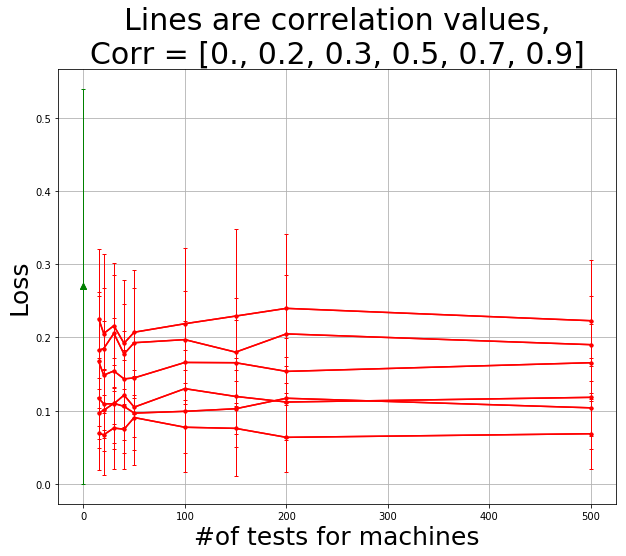

In [26]:
data = pd.read_csv('../output/data/fig3_tests_num.csv')
fig, ax = plt.subplots(figsize=(10,8))

y_srun = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['tests_num'] == 0)]['loss_mean'].values
err_srun = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['tests_num'] == 0)]['loss_mean'].values
plt.plot(0, y_srun, label='Crowd-Ensemble', marker='^', color='green')
plt.errorbar(0, y_srun, yerr=err_srun, marker='^', elinewidth=1, color='green', capsize=2)

x = [15.,   20.,   30.,   40.,   50.,  100.,  150.,  200.,  500.]
corr = data['corr'].unique()
for c in corr:
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['loss_mean'].values
#     x = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['tests_num'] == t)]['price_mean'].values
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['loss_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble', marker='.', color='red')
    plt.errorbar(x, y, yerr=err, marker='.', elinewidth=1, color='red', capsize=2)

plt.title('Lines are correlation values,\nCorr = [0., 0.2, 0.3, 0.5, 0.7, 0.9]', size=30)
plt.xlabel('#of tests for machines', size=25)
plt.ylabel('Loss', size=25)
# plt.legend(fontsize = 25)
plt.grid()

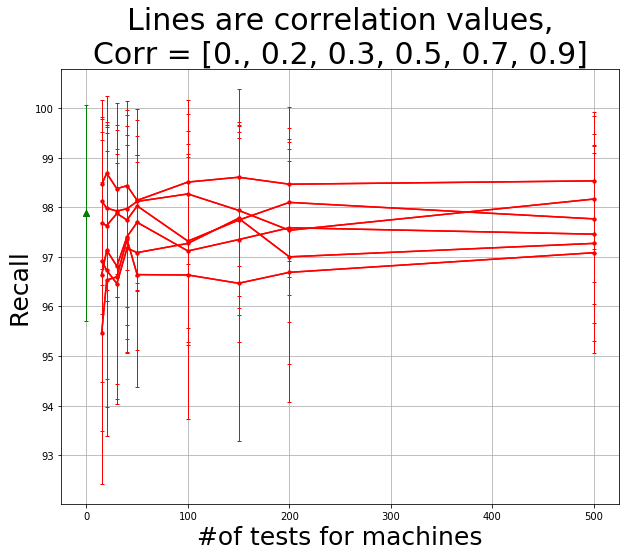

In [27]:
fig, ax = plt.subplots(figsize=(10,8))

y_srun = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['tests_num'] == 0)]['recall'].values
err_srun = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['tests_num'] == 0)]['recall_std'].values
plt.plot(0, y_srun, label='Crowd-Ensemble', marker='^', color='green')
plt.errorbar(0, y_srun, yerr=err_srun, marker='^', elinewidth=1, color='green', capsize=2)

x = [15.,   20.,   30.,   40.,   50.,  100.,  150.,  200.,  500.]
corr = data['corr'].unique()
for c in corr:
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['recall'].values
#     x = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['tests_num'] == t)]['price_mean'].values
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['recall_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble', marker='.', color='red')
    plt.errorbar(x, y, yerr=err, marker='.', elinewidth=1, color='red', capsize=2)

plt.title('Lines are correlation values,\nCorr = [0., 0.2, 0.3, 0.5, 0.7, 0.9]', size=30)
plt.xlabel('#of tests for machines', size=25)
plt.ylabel('Recall', size=25)
# plt.legend(fontsize = 25)
plt.grid()

# 3. Chart: vary machine-selection-confidence

machine_selec_conf in [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]

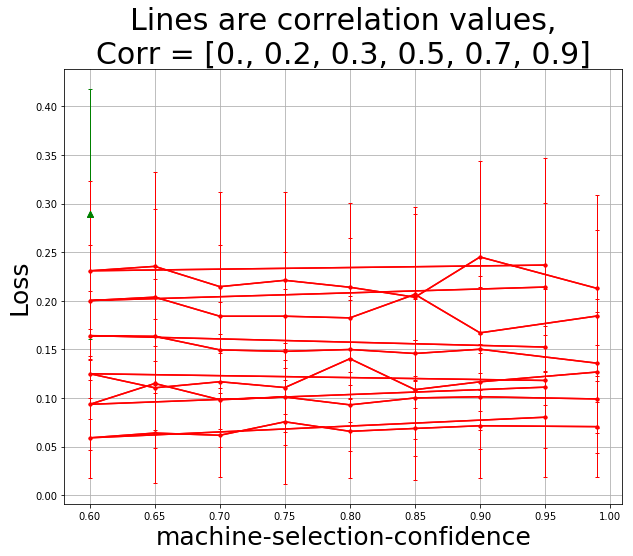

In [28]:
data = pd.read_csv('../output/data/fig2_select_conf.csv')

fig, ax = plt.subplots(figsize=(10,8))

y_srun = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['tests_num'] == 0)]['loss_mean'].values[0]
err_srun = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['tests_num'] == 0)]['loss_std'].values[0]
plt.plot(0.6, y_srun, label='Crowd-Ensemble', marker='^', color='green')
plt.errorbar(0.6, y_srun, yerr=err_srun, marker='^', elinewidth=1, color='green', capsize=2)

x = data['select_conf'].unique()
corr = data['corr'].unique()
for c in corr:
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['loss_mean'].values
#     x = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['tests_num'] == t)]['price_mean'].values
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['loss_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble', marker='.', color='red')
    plt.errorbar(x, y, yerr=err, marker='.', elinewidth=1, color='red', capsize=2)

plt.title('Lines are correlation values,\nCorr = [0., 0.2, 0.3, 0.5, 0.7, 0.9]', size=30)
plt.xlabel('machine-selection-confidence', size=25)
plt.ylabel('Loss', size=25)
# plt.legend(fontsize = 25)
plt.grid()

# 4. Chart: vary expert cost

expert_vote_cost in [10,  20, 30, 40, 50, 70, 100]

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


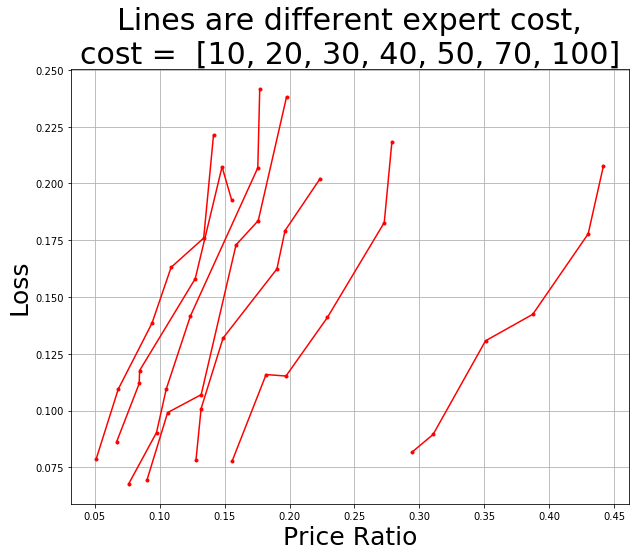

In [42]:
data = pd.read_csv('../output/data/fig1_expert_cost.csv')

fig, ax = plt.subplots(figsize=(10,8))
# colors = ['green', 'green', 'red', 'red']
colors = ['green', 'red']
algos = ['Crowd-Ensemble', 'Hybrid-Ensemble']
ax.set_color_cycle(colors)

markers = ['^', '.']
def plot_alg(data, alg, marker, c):
    y = data.loc[(data['algorithm'] == alg) & (data['tests_num'] == 50) & (data['expert_cost'] == c)]['loss_mean'].values
    x = data.loc[(data['algorithm'] == alg) & (data['tests_num'] == 50) & (data['expert_cost'] == c)]['price_mean'].values
    x /= c
    err = data.loc[(data['algorithm'] == alg) & (data['tests_num'] == 50) & (data['expert_cost'] == c)]['loss_std'].values
    plt.plot(x, y, label=alg, marker=marker)
#     plt.errorbar(x, y, yerr=err, marker=marker, elinewidth=1, capsize=2)

expert_cost = data['expert_cost'].unique()
# expert_vote_cost = [10, 30]
for c in expert_cost:
    for alg, marker in zip(algos, markers):
        plot_alg(data, alg, marker, c)

plt.title('Lines are different expert cost,\ncost =  [10, 20, 30, 40, 50, 70, 100]', size=30)
plt.xlabel('Price Ratio', size=25)
plt.ylabel('Loss', size=25)
# plt.ylim((0., 0.5))
# plt.legend(fontsize = 25)
plt.grid()

# 5. Chart (Price Ratio vs Expert cost)

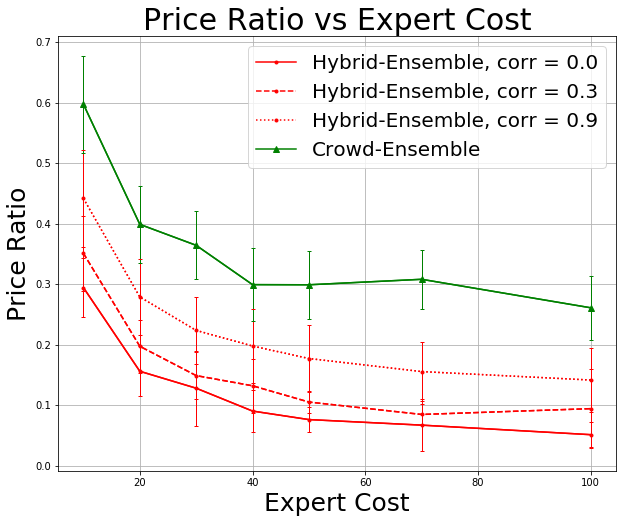

In [47]:
from operator import truediv
data = pd.read_csv('../output/data/fig1_expert_cost.csv')

fig, ax = plt.subplots(figsize=(10,8))

expert_cost = data['expert_cost'].unique()
x = expert_cost

corr_list = data['corr'].unique()
# for corr in corr_list:
for corr, s in zip([0., 0.3, 0.9], ['-', '--', ':']):
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['tests_num'] == 50) 
                 & (data['corr'] == corr)]['price_mean'].values
    y = list(map(truediv, y, x))
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['tests_num'] == 50) 
                 & (data['corr'] == corr)]['price_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble, corr = {}'.format(corr), marker='.', color='red', linestyle=s)
    err = list(map(truediv, err, x))
    plt.errorbar(x, y, yerr=err, elinewidth=1, color='red', linestyle=s, capsize=2)
 
for corr in [0.]:
    y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['tests_num'] == 0) 
                 & (data['corr'] == corr)]['price_mean'].values
    y = list(map(truediv, y, x))
    err2 = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['tests_num'] == 0) 
                 & (data['corr'] == corr)]['price_std'].values
    plt.plot(x, y, label='Crowd-Ensemble', marker='^', color='green')
    err2 = list(map(truediv, err2, x))
    plt.errorbar(x, y, yerr=err, elinewidth=1, color='green', capsize=2)



plt.title('Price Ratio vs Expert Cost', size=30)
plt.ylabel('Price Ratio', size=25)
plt.xlabel('Expert Cost', size=25)
# plt.ylim((0., 0.5))
plt.legend(fontsize = 20)
plt.grid()

# 6. Test different theta (proportion of relevant items)

Theta in [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

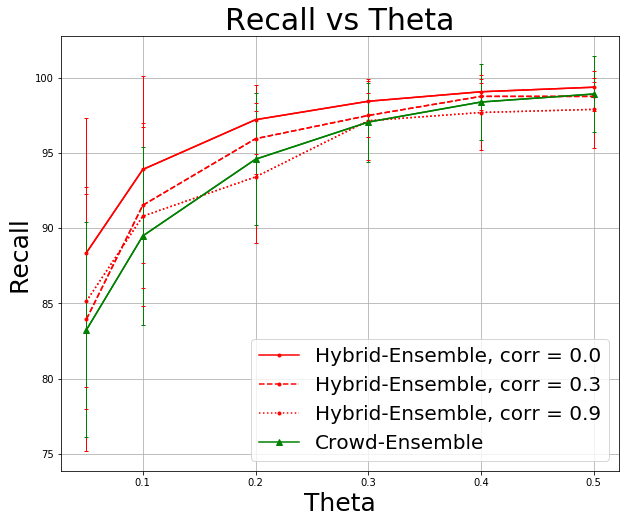

In [48]:
data = pd.read_csv('../output/data/fig4_theta.csv')

data['price_mean'] /= 20
data['price_std'] /= 20

fig, ax = plt.subplots(figsize=(10,8))

x = data['theta'].unique()
for corr, s in zip([0., 0.3, 0.9], ['-', '--', ':']):
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['recall'].values
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['recall_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble, corr = {}'.format(corr), marker='.', color='red', linestyle=s)
    plt.errorbar(x, y, yerr=err, elinewidth=1, color='red', linestyle=s, capsize=2)
 
y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['recall'].values
err2 = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['recall_std'].values
plt.plot(x, y, label='Crowd-Ensemble', marker='^', color='green')
err2 = list(map(truediv, err2, x))
plt.errorbar(x, y, yerr=err, elinewidth=1, color='green', capsize=2)



plt.title('Recall vs Theta', size=30)
plt.ylabel('Recall', size=25)
plt.xlabel('Theta', size=25)
# plt.ylim((70., 102))
plt.legend(fontsize = 20)
plt.grid()

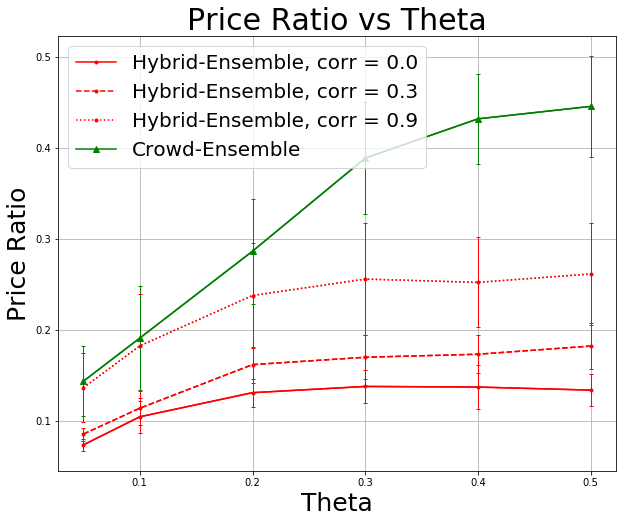

In [34]:
data = pd.read_csv('../output/data/fig4_theta.csv')

data['price_mean'] /= 20
data['price_std'] /= 20

fig, ax = plt.subplots(figsize=(10,8))

x = data['theta'].unique()
for corr, s in zip([0., 0.3, 0.9], ['-', '--', ':']):
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['price_mean'].values
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['price_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble, corr = {}'.format(corr), marker='.', color='red', linestyle=s)
    plt.errorbar(x, y, yerr=err, elinewidth=1, color='red', linestyle=s, capsize=2)
 
y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['price_mean'].values
err2 = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['price_std'].values
plt.plot(x, y, label='Crowd-Ensemble', marker='^', color='green')
err2 = list(map(truediv, err2, x))
plt.errorbar(x, y, yerr=err, elinewidth=1, color='green', capsize=2)



plt.title('Price Ratio vs Theta', size=30)
plt.ylabel('Price Ratio', size=25)
plt.xlabel('Theta', size=25)
# plt.ylim((70., 102))
plt.legend(fontsize = 20)
plt.grid()